# <u>Zoom sur les références 

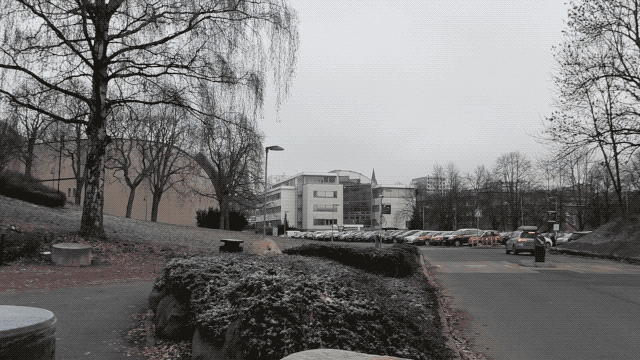

On va diviser cette partie en deux : on s'interessera tout d'abord au **Top des ventes** pour ensuite nous attarder sur les **Flops**.

# <u>Top des ventes

Ce sera très simple, on aura besoin que **d'une seule ligne de code** . On va **grouper les transactions par leur identifiants produit** grace à la méthode **.groupby** compter le nombre d'identifiant session grace à la méthode **.count()**, et enfin classer le résultat par **ordre decroissant**. La méthode **.head()** permettra de limiter le nombre de résultat affichés.

In [97]:
reelles_transactions.groupby(["id_prod"])["session_id"].count().sort_values(ascending=False).head(10)

id_prod
1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
Name: session_id, dtype: int64

Les 10 produits les mieux vendus font tous partis de la **catégorie 1**. Il se sont vendu à environs **2000 exemplaires chacuns**. Sauvegardons ces valeurs dans une variable **Top_10_relles_transactions** 

In [98]:
Top_10_relles_transactions = reelles_transactions.groupby(["id_prod"])["session_id"].count().sort_values(ascending=False).head(10)

# <u>Pires ventes 

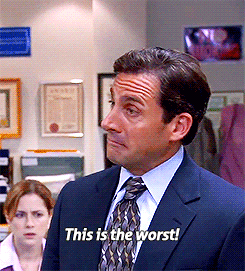

Ce sera tout aussi simple, on va faire exactement **la même chose sauf que je vais classer le résultat par ordre croissant.**

In [99]:
reelles_transactions.groupby(["id_prod"])["session_id"].count().sort_values().head(10)

id_prod
0_549     1
0_2201    1
2_23      1
0_1284    1
0_1683    1
0_833     1
2_98      1
0_1633    1
0_1601    1
2_81      1
Name: session_id, dtype: int64

Ok ! On voit une liste de **10 produits ( choix arbitraire !)** qui n'ont été vendus qu'une seule fois. Mais peut être qu'il existe un **onzième produit à n'avoir été vendu qu'une seule fois**. Vérifions cette hypothèse.

In [100]:
reelles_transactions.groupby(["id_prod"])["session_id"].count().sort_values().head(11)

id_prod
0_549     1
0_2201    1
2_23      1
0_1284    1
0_1683    1
0_833     1
2_98      1
0_1633    1
0_1601    1
2_81      1
0_807     1
Name: session_id, dtype: int64

On voit une liste de **11 produit ( à nouveau :choix arbitraire )** qui n'ont été vendus qu'une seule fois. Mais peut être qu'il existe un **douzième produits à n'avoir été vendu qu'une seule fois**. Mais on ne va pas continuer, de cette façon, en tatonnant, jusqu'à ce qu'on trouve un produit à n'avoir été vendu que deux ou trois fois ( ce qu'on peut aussi considerer comme un produit peu attractif)
Ce qu'on va faire ici c'est sauvegarder tout d'abord ce résultat dans une variable **Flop_10_relles_transactions sans la méthode .head()**

In [101]:
flop_10_reelles_transactions = reelles_transactions.groupby(["id_prod"])["session_id"].count().sort_values()

On va ensuite convertir cette series en un dataframe grace à la méthode **.to_frame()**

In [102]:
flop_10_reelles_transactions=flop_10_reelles_transactions.to_frame(name="Nb de vente").reset_index()

In [103]:
flop_10_reelles_transactions

id_prod  Nb de vente
0      0_549            1
1     0_2201            1
2       2_23            1
3     0_1284            1
4     0_1683            1
...      ...          ...
3261   1_425         2096
3262   1_498         2128
3263   1_414         2180
3264   1_417         2189
3265   1_369         2252

[3266 rows x 2 columns]

Maintenant, on peut chercher les lignes où on un produit a été vendu **3 fois ou moins sur la période 2021- début 2023 par exemple.**

In [104]:
flop_10_reelles_transactions.loc[flop_10_reelles_transactions["Nb de vente"] <= 3]

id_prod  Nb de vente
0    0_549            1
1   0_2201            1
2     2_23            1
3   0_1284            1
4   0_1683            1
..     ...          ...
90    2_28            3
91    0_43            3
92  0_1715            3
93   0_964            3
94  0_1794            3

[95 rows x 2 columns]

Les produits les moins bien vendus font partis des catégorie **0 et 2**. Ils représentent une vente . Sauvegardons ces valeurs dans une variable **Flop_10_relles_transactions**

# <u>REPARTITION PAR CATEGORIE 

In [105]:
colors = sns.color_palette('pastel')[0:5]

Occupons nous à présent, de la partie concernant la répartition par catégorie. A nouveau la formulation de la requête d'Antoine est assez vague... Elle nous laisse cependant un grande indépendance quant à la définition des informations qu'il serait pertinent d'extraire de nos données.

Commençons par répondre  une question simple : La répartition des produits en fonction de la catégorie. Pour ce faire, on utilisera les méthode .groupby() et .count()

In [106]:
# Repartition des references parmis les categories:
repartition_categ = products.groupby(["categ"])["id_prod"].count()
repartition_categ

categ
0    2308
1     739
2     239
Name: id_prod, dtype: int64

Convertissons cette série en df grace à la méthode .to_frame()

In [107]:
repartition_categ = repartition_categ.to_frame(name= "Nombre de produit").reset_index()
repartition_categ

categ  Nombre de produit
0     0               2308
1     1                739
2     2                239

Passons à la représentation graphique, étant donné qu'il s'agit d'une répartition, nous partirons sur un pie chart.

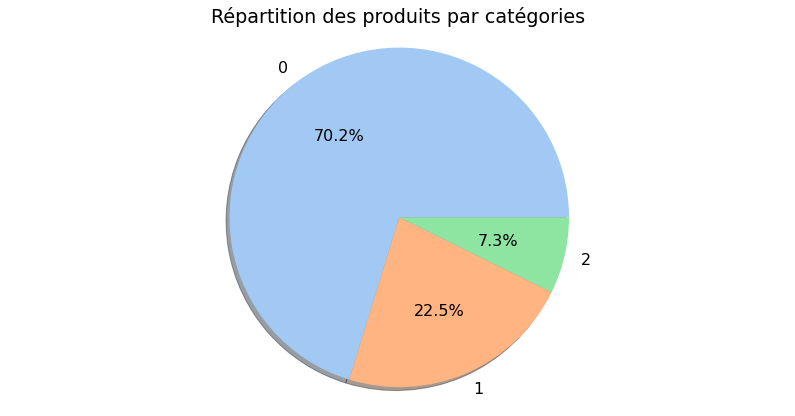

In [108]:
# Graphique:
fig1, ax1 = plt.subplots()
ax1.pie(repartition_categ["Nombre de produit"],
        labels=["0","1","2"],
        autopct="%1.1f%%",
        colors=colors,
        shadow=True)
ax1.axis("equal")
plt.title("Répartition des produits par catégories")
plt.show()

Passons au volume des ventes par catégories, en somme quels sont les produits les plus acheté par nos clients. On utiliseras la méthode .groupby() et .count() On procédera comme précédemment 

In [109]:
vol_categ = reelles_transactions.groupby(["categ"])["session_id"].count()
vol_categ= vol_categ.to_frame(name = "Nb de ventes").reset_index()
vol_categ

categ  Nb de ventes
0   0.00        415680
1   1.00        227169
2   2.00         36483

Passons à la représentation  graphique

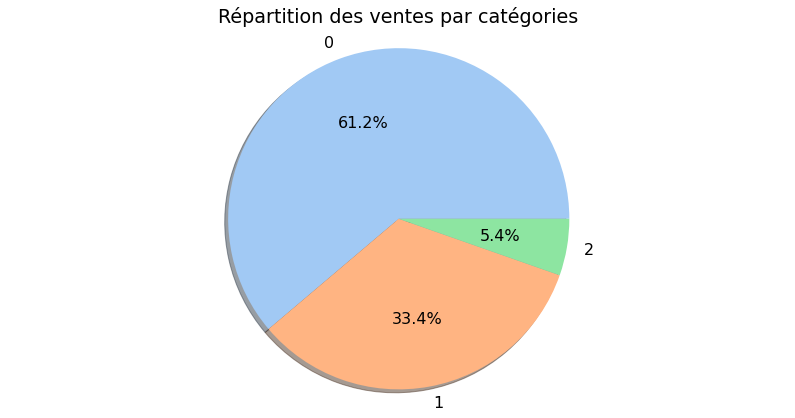

In [110]:
fig2, ax2 = plt.subplots()
ax2.pie(vol_categ["Nb de ventes"],
        labels=["0","1","2"],
        autopct="%1.1f%%",
        colors=colors,
        shadow=True)
ax2.axis("equal")
plt.title("Répartition des ventes par catégories")
plt.show()

Passons au prix moyen par catégorie

In [111]:
prix_categ = products.groupby(["categ"])["price"].mean()
prix_categ= prix_categ.to_frame(name="Prix moyen par catégorie").reset_index()
prix_categ

categ  Prix moyen par catégorie
0     0                     11.73
1     1                     25.53
2     2                    108.35

On choisira une représentation de ces moyenne par un diagramme en baton 

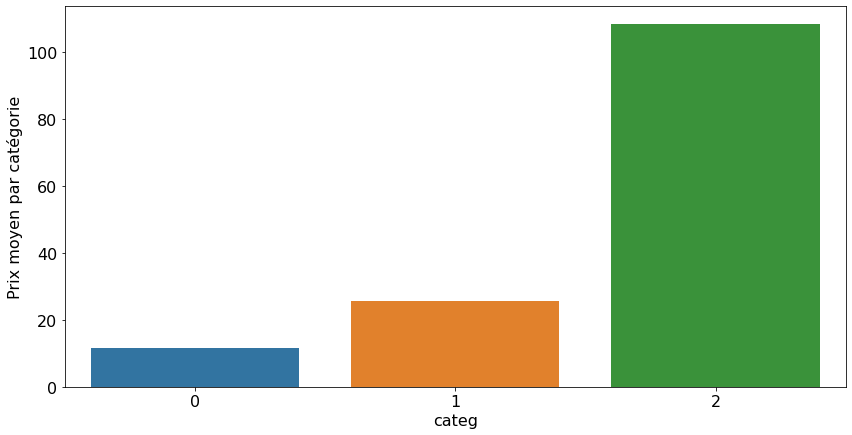

In [112]:
sns.barplot(data=prix_categ, x="categ", y="Prix moyen par catégorie")
plt.show()

On se rend commpte que les produits de catégorie 2 sont en moyenne 10 plus chers que ceux de la catégorie 0 et 4 fois plus chers que ceux de la catégorie 1.
Le problème avec la moyenne c'est qu'elle n'est pas vraiment représentative. Passons à une autre représentation graphique qui nous permettra d'en savoir un peu plus sur la distribution des prix des produits par catégorie : La boîte à moustache.

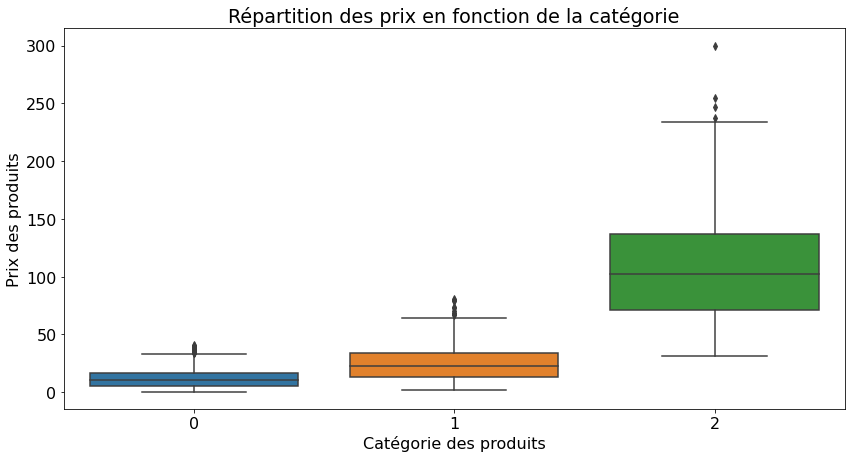

In [113]:
sns.boxplot(data=products, x='categ', y='price')
plt.xlabel('Catégorie des produits')
plt.ylabel('Prix des produits')
plt.title('Répartition des prix en fonction de la catégorie')
plt.show()

On remarque que les prix des produits de la catégorie 2 sont plus étalés que ceux des deux autres catégories. 50%  des produits ont un prix inférieurs à 100 € tandis que 50 % de ces produits on un prix supérieur.

Passons au chiffre d'affaire généré par catégorie de produit.

In [114]:
# CA par categories:
ca_categ = reelles_transactions.groupby(reelles_transactions["categ"])["price"].sum()
ca_categ= ca_categ.to_frame(name="CA par categorie").reset_index()
ca_categ


categ  CA par categorie
0   0.00        4421938.76
1   1.00        4653722.69
2   2.00        2780275.02

Passons à la représentation graphique 

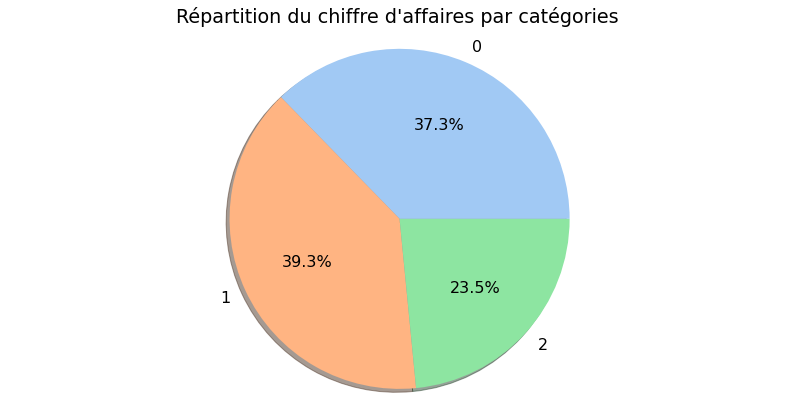

In [115]:
# Graphique:
fig3, ax3 = plt.subplots()
ax3.pie(ca_categ["CA par categorie"],
        labels=["0","1","2"],
        autopct="%1.1f%%",
        colors=colors,
        shadow=True)
ax3.axis("equal")
plt.title("Répartition du chiffre d'affaires par catégories")
plt.show()